In [1]:
pip install turicreate

     |████████████████████████████████| 91.2MB 39.8MB/s eta 0:00:011MB 2.8MB/s eta 0:00:22     |███████████████████▏            | 54.5MB 40.2MB/s eta 0:00:01��████████████████████▊  | 84.8MB 39.8MB/s eta 0:00:01.2MB 39.8MB/s eta 0:00:01
     |████████████████████████████████| 17.3MB 15.7MB/s eta 0:00:01
     |████████████████████████████████| 3.4MB 26.8MB/s eta 0:00:01
     |████████████████████████████████| 421.8MB 87kB/s s eta 0:00:01██▋                   | 166.2MB 42.5MB/s eta 0:00:07��██▏           | 266.3MB 40.3MB/s eta 0:00:04:00:04��        | 307.0MB 43.6MB/s eta 0:00:03███████████████████████▊      | 338.9MB 41.9MB/s eta 0:00:02MB/s eta 0:00:02ta 0:00:01
     |████████████████████████████████| 327kB 32.4MB/s eta 0:00:01
     |████████████████████████████████| 3.8MB 35.0MB/s eta 0:00:01
     |████████████████████████████████| 51kB 15.2MB/s eta 0:00:01
     |████████████████████████████████| 450kB 34.6MB/s eta 0:00:01
     |████████████████████████████████| 51kB 13.9MB/s eta 0:00

In [2]:
import turicreate as tc

In [3]:
sales = tc.SFrame('home_data.sframe')

In [4]:
import numpy as np

In [5]:
def get_numpy_data(data_sframe, features, output):
    data_sframe['constant'] = 1 
    features = ['constant'] + features
    features_sframe = data_sframe[features]
    feature_matrix = features_sframe.to_numpy()
    output_sarray = data_sframe[output]
    output_array = output_sarray.to_numpy()
    return(feature_matrix, output_array)

In [6]:
def predict_output(feature_matrix, weights):
    predictions = np.dot(feature_matrix, weights)
    return(predictions)

In [8]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    if feature_is_constant == True:
        derivative = 2 * np.dot(errors, feature)
    else:
        derivative = 2 * np.dot(errors, feature) + 2*(l2_penalty*weight)
    return derivative

In [9]:
(example_features, example_output) = get_numpy_data(sales, ['sqft_living'], 'price')
my_weights = np.array([1., 10.])
test_predictions = predict_output(example_features, my_weights)
errors = test_predictions - example_output
print(feature_derivative_ridge(errors, example_features[:,1], my_weights[1], 1, False))
print(np.sum(errors*example_features[:,1])*2+20)
print(feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True))
print(np.sum(errors)*2)

-56554166782350.0
-56554166782350.0
-22446749336.0
-22446749336.0


In [18]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    weights = np.array(initial_weights)
    while max_iterations > 0:
        predictions = predict_output(feature_matrix, weights)
        errors = predictions - output
        for i in range(len(weights)):
            if i == 0:
                feature_is_constant = True
            else:
                feature_is_constant = False
            derivative = feature_derivative_ridge(errors, feature_matrix[:,i], weights[i], l2_penalty, feature_is_constant)
            weights[i] = weights[i] - (step_size * derivative)
        max_iterations -= 1            
    return weights

In [13]:
train_data,test_data = sales.random_split(.8,seed=0)

In [14]:
simple_features = ['sqft_living']
my_output = 'price'

In [15]:
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)

In [16]:
initial_weights = np.array([0., 0.])
step_size = 1e-12
max_iterations=1000

In [19]:
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, 
                                                             initial_weights, step_size, 
                                                             0.0, max_iterations)
print(simple_weights_0_penalty)

[-1.63113501e-01  2.63024369e+02]


In [20]:
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, 
                                                             initial_weights, step_size, 
                                                             1e11, max_iterations)
print(simple_weights_high_penalty)

[  9.76730383 124.57217565]


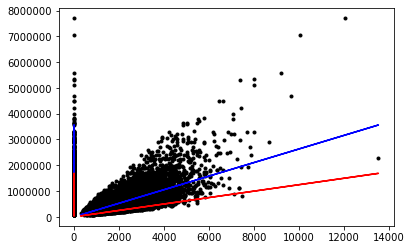

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(simple_feature_matrix,output,'k.',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_high_penalty),'r-')

In [22]:
initial_predictions = predict_output(simple_test_feature_matrix, initial_weights)
initial_residuals = test_output - initial_predictions
initial_RSS = (initial_residuals **2).sum()
print(initial_RSS)

1784273282524564.0


In [23]:
no_regularization_predictions = predict_output(simple_test_feature_matrix, simple_weights_0_penalty)
no_regularization_residuals = test_output - no_regularization_predictions
no_regularization_RSS = (no_regularization_residuals **2).sum()
print(no_regularization_RSS)

275723634597546.75


In [24]:
regularization_predictions = predict_output(simple_test_feature_matrix, simple_weights_high_penalty)
regularization_residuals = test_output - regularization_predictions
regularization_RSS = (regularization_residuals **2).sum()
print(regularization_RSS)

694642100913950.1


In [25]:
model_features = ['sqft_living', 'sqft_living15']
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train_data, model_features, my_output)
(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)

In [26]:
initial_weights = np.array([0.0,0.0,0.0])
step_size = 1e-12
max_iterations = 1000

In [27]:
multiple_weights_0_penalty = ridge_regression_gradient_descent(feature_matrix, output, 
                                                               initial_weights, step_size, 
                                                               0.0, max_iterations)
print(multiple_weights_0_penalty)

[ -0.35743482 243.0541689   22.41481594]


In [28]:
multiple_weights_high_penalty = ridge_regression_gradient_descent(feature_matrix, output, 
                                                               initial_weights, step_size, 
                                                               1e11, max_iterations)
print(multiple_weights_high_penalty)

[ 6.7429658  91.48927361 78.43658768]


In [29]:
initial_predictions = predict_output(test_feature_matrix, initial_weights)
initial_residuals = test_output - initial_predictions
initial_RSS = (initial_residuals **2).sum()
print(initial_RSS)

1784273282524564.0


In [30]:
no_regularization_predictions = predict_output(test_feature_matrix, multiple_weights_0_penalty)
no_regularization_residuals = test_output - no_regularization_predictions
no_regularization_RSS = (no_regularization_residuals **2).sum()
print(no_regularization_RSS)

274067618287245.2


In [31]:
regularization_predictions = predict_output(test_feature_matrix, multiple_weights_high_penalty)
regularization_residuals = test_output - regularization_predictions
regularization_RSS = (regularization_residuals **2).sum()
print(regularization_RSS)

500404800579555.5


In [32]:
print(no_regularization_predictions[0])
print(test_output[0] - no_regularization_predictions[0])

387465.47646474396
-77465.47646474396


In [33]:
print(regularization_predictions[0])
print(test_output[0] - regularization_predictions[0])

270453.5303048586
39546.46969514142
